This program is a continuation of the file US Presidential Elections 2020

Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and read file.

File was taken from the following sites and apended:-
present taken from:- https://www.kaggle.com/unanimad/us-election-2020?select=president_county_candidate.csv
past taken from:- https://electionlab.mit.edu/data

In [16]:
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/US-presidential-elections-2020/main/series.csv")
train

,state,candidate,party,year,candidatevotes
0,Alabama,"Carter, Jimmy",1.0,1976,659170
1,Alabama,"Ford, Gerald",2.0,1976,504070
2,Alabama,"Maddox, Lester",3.0,1976,9198
3,Alabama,"Bubar, Benjamin """"Ben""""",3.0,1976,6669
4,Alabama,"Hall, Gus",3.0,1976,1954
...,...,...,...,...,...
4086,Wyoming,Write-ins,3.0,2020,1739
4087,Wyoming,Brock Pierce,3.0,2020,2208
4088,Wyoming,Donald Trump,2.0,2020,193559
4089,Wyoming,Jo Jorgensen,3.0,2020,5768


Check for null values

In [17]:
train.isnull().sum()

state             0
candidate         0
party             0
year              0
candidatevotes    0
dtype: int64

Create dataset

In [18]:
#create pivot table
dataset = train.pivot_table(index = ['state', 'party'],values = ['candidatevotes'],columns = ['year'],fill_value = 0,aggfunc='sum')
dataset.reset_index(inplace = True)
dataset

state party candidatevotes  ...                           
year                            1976  ...     2012     2016     2020
0       Alabama   1.0         659170  ...   795696   729547   849624
1       Alabama   2.0         504070  ...  1255925  1318255  1441170
2       Alabama   3.0          19610  ...    22717    75570    32488
3        Alaska   1.0          44058  ...   122640   116454   153129
4        Alaska   2.0          71555  ...   164676   163387   189484
..          ...   ...            ...  ...      ...      ...      ...
148   Wisconsin   2.0        1004987  ...  1410966  1405284  1610151
149   Wisconsin   3.0          56117  ...    39483   188330    56567
150     Wyoming   1.0          62239  ...    69286    55973    73491
151     Wyoming   2.0          92717  ...   170962   174419   193559
152     Wyoming   3.0           1387  ...    10453    28396     9715

[153 rows x 14 columns]

In [19]:
state = dataset.state
party = dataset.party

dataset = dataset.drop(['state', 'party'],axis=1)
dataset

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


candidatevotes                    ...                           
year           1976     1980     1984  ...     2012     2016     2020
0            659170   636730   551899  ...   795696   729547   849624
1            504070   654192   872849  ...  1255925  1318255  1441170
2             19610    51007    16965  ...    22717    75570    32488
3             44058    41842    62007  ...   122640   116454   153129
4             71555    86112   138377  ...   164676   163387   189484
..              ...      ...      ...  ...      ...      ...      ...
148         1004987  1088845  1198584  ...  1410966  1405284  1610151
149           56117   202792    17365  ...    39483   188330    56567
150           62239    49427    53370  ...    69286    55973    73491
151           92717   110700   133241  ...   170962   174419   193559
152            1387    16586     2357  ...    10453    28396     9715

[153 rows x 12 columns]

Define X, y and X_test

In [20]:
#split the dataset in two
# the last column is our label
y_train = dataset.iloc[:,-1:]
#drop last column of data
X_train = dataset.iloc[:, :-1]
#drop first colum of data
X_test = dataset.iloc[:,1:]
# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(153, 11) (153, 1) (153, 11)


Define the model

In [21]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

model = AdaBoostRegressor(base_estimator = RandomForestRegressor(max_depth=5), random_state=1, n_estimators=1000).fit(X_train, y_train)

y_pred = model.predict(X_train)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  878714.05503228,  1513577.4946361 ,    88542.89431096,
         125975.60709325,   205921.93605826,    72034.15198198,
        1611170.48538386,  1589339.24252262,    93257.7899494 ,
         454066.84430718,   726671.69769647,    77881.34122807,
       11082293.        ,  5982194.        ,   375516.49512522,
        1726071.04311864,  1432241.2126182 ,   106378.19178326,
        1131487.00920946,   677413.62880401,    98881.04439672,
         303115.50995269,   214854.16811512,    70169.90073413,
         359728.54463957,    78097.56591243,    70169.90073413,
        5302647.66507576,  5657580.42      ,   134728.07197021,
        2410375.18960302,  2552739.26964076,    86872.65330295,
         426785.38834613,   220061.9375445 ,    71123.07471143,
         284782.20136942,   529198.81443136,    76855.69056287,
        4253945.68374603,  2880653.53570411,   159973.67557748,
        1298487.15528401,  1801443.4994905 ,    99502.66140465,
         833326.95540025,   838589.71065

In [22]:
print(model.score(X_train, y_train))

0.9987269569357847


Make predictions

In [27]:
pred = model.predict(X_test)
pred = pred.astype(int)
pred

array([  898359,  1636745,   145186,   139924,   209002,    87195,
        1723731,  1739401,   172898,   559112,   690271,   117143,
       11012788,  7355845,   603643,  1833293,  1577406,   196534,
        1149708,   681403,   187081,   328155,   205060,    74392,
         416840,    77525,    73650,  5513701,  5653548,   281937,
        2473365,  2681438,   157121,   423637,   220567,    76597,
         300195,   545238,   135140,  4326600,  3059394,   288241,
        1460920,  1873148,   268659,   849784,   852039,   175035,
         525494,   809865,   164537,   747229,  1505588,   143903,
         883497,  1477684,   147830,   520374,   431795,   145943,
        1990735,  1148983,   178618,  2583270,  1378161,   300139,
        3176057,  2993783,   286690,  1320662,  1781391,  1125151,
         540961,   871463,   110861,  1517151,  1869968,   262737,
         259771,   424461,   114670,   410438,   539845,   139610,
         580796,   593543,   134372,   505803,   482752,   116

In [28]:
# creating dataframe with required columns 
prediction = pd.DataFrame({'state':state,'party':party, 'prediction_2024': pred})
prediction

,state,party,prediction_2024
0,Alabama,1.0,898359
1,Alabama,2.0,1636745
2,Alabama,3.0,145186
3,Alaska,1.0,139924
4,Alaska,2.0,209002
...,...,...,...
148,Wisconsin,2.0,1821300
149,Wisconsin,3.0,278074
150,Wyoming,1.0,121974
151,Wyoming,2.0,206526


Graphical representation
Democrat 1, Republican 2, Other 3

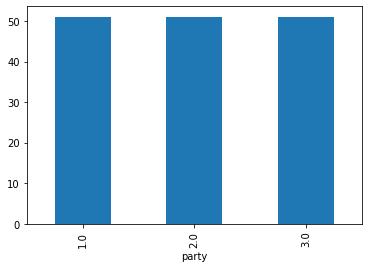

In [32]:
prediction.groupby('party')['prediction_2024'].count().plot.bar(ylim=0)
plt.show()

In [33]:
predict_winner = prediction.groupby('party')['prediction_2024'].sum()
predict_winner

party
1.0    85291876
2.0    81102023
3.0    10479337
Name: prediction_2024, dtype: int64